<a href="https://colab.research.google.com/github/wahyudi0018/PCVK_Ganjil_2024/blob/main/Modul5_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama  : Wahyudi**

**Kelas : TI-3C**

**No. Absen : 26**

## Tugas 1: Gamma Correction pada citra

In [14]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Gamma Correction pada citra
----------------------------------
Masukkan nilai Gamma: 3


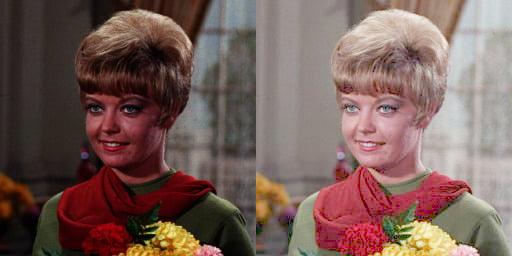

In [15]:
print('Gamma Correction pada citra')
print('----------------------------------')

#meminta nilai Gamma dari pengguna
try:
    gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, bukan angka')
    gamma = 1  # Set default value jika input tidak valid

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

# Normalisasi nilai gamma
inv_gamma = 1.0 / gamma

# Mengakses per pixel dan menerapkan gamma correction
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            # Normalisasi nilai pixel
            pixel = original[y, x, c] / 255.0
            # Menerapkan gamma correction
            gamma_pixel = np.power(pixel, inv_gamma) * 255
            # Menyimpan hasil gamma correction
            gamma_image[y, x, c] = np.clip(gamma_pixel, 0, 255)

# Cara simpel tanpa loop
# gamma_image = cv.pow(original / 255.0, inv_gamma) * 255
# gamma_image = np.clip(gamma_image, 0, 255).astype(np.uint8)

# Menggabungkan gambar asli dan gambar hasil gamma correction
final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

## Tugas 2: Simulasi image depth pada citra

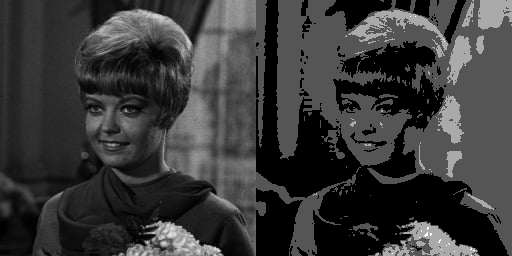

In [73]:
bit_depth = 2
level = 255 / (pow(2,bit_depth)-1)
image_path = '/content/drive/MyDrive/PCVK/Images/female.tiff'
original = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Memeriksa apakah gambar berhasil dibaca
if original is None:
    print(f"Error: Gambar tidak ditemukan di {image_path}")
else:
    # Membuat gambar kosong untuk menyimpan hasil konversi
    depth_image = np.zeros(original.shape, dtype=np.uint8)

    # Mengakses setiap pixel dan menerapkan konversi kedalaman bit
    for y in range(original.shape[0]):
        for x in range(original.shape[1]):
            # Menghitung nilai kedalaman berdasarkan bit depth
            depth_image[y, x] = np.clip(round(original[y, x] / level) * level, 0, 255)

    # Cara simpel tanpa loop
    # depth_image = np.clip(np.round(original / level) * level, 0, 255).astype(np.uint8)

    # Menampilkan gambar asli dan gambar kedalaman
    final_frame = cv.hconcat((original, depth_image))
    cv2_imshow(final_frame)

## Tugas 3: Modul average denoising pada citra

nilai PSNR untuk 5 Citra di Average: 31.47 dB


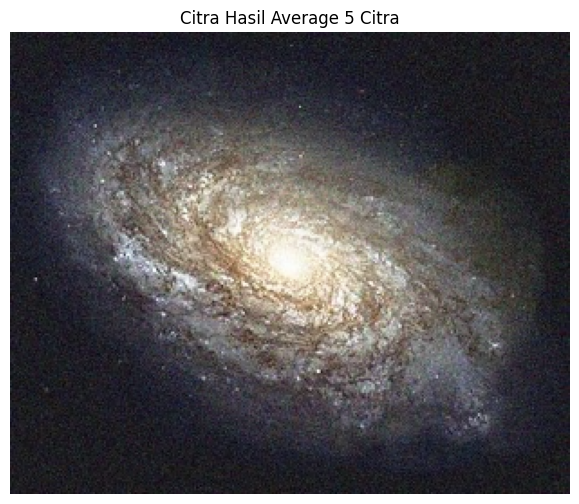

nilai PSNR untuk 10 Citra di Average: 33.82 dB


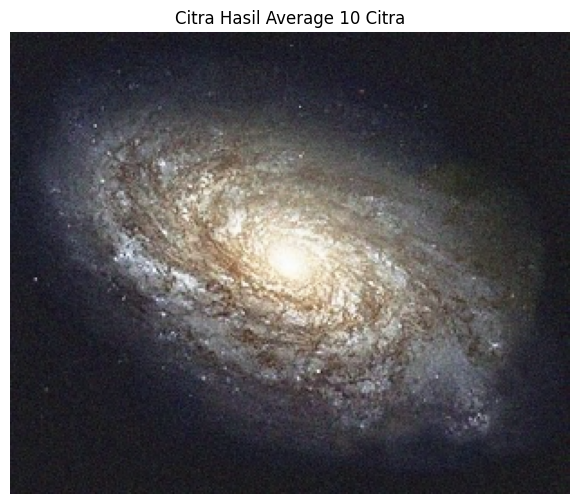

nilai PSNR untuk 20 Citra di Average: 37.18 dB


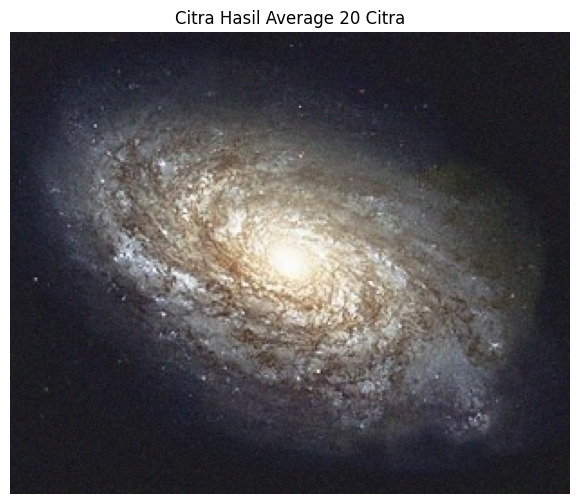

nilai PSNR untuk 40 Citra di Average: 41.30 dB


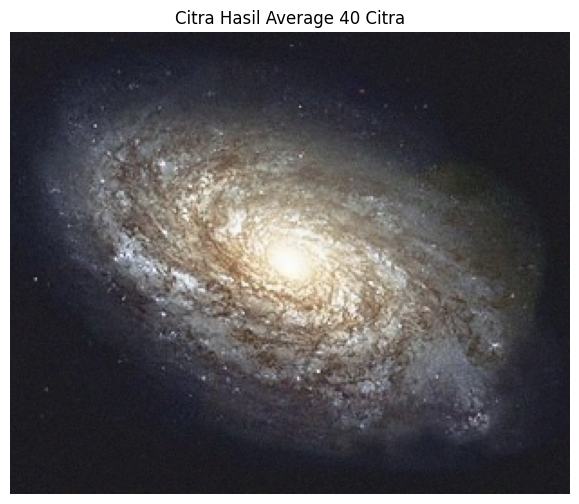

nilai PSNR untuk 80 Citra di Average: 48.37 dB


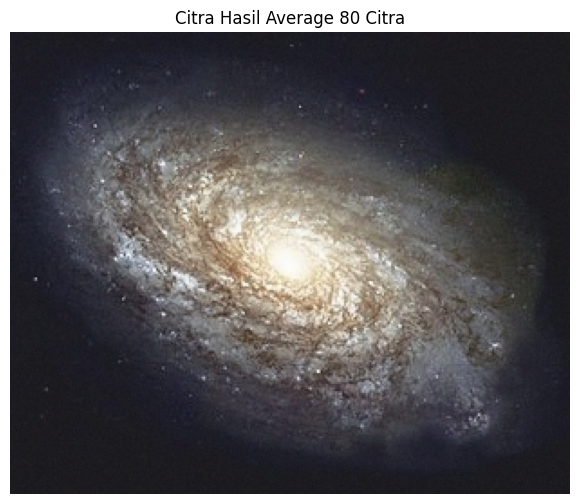

nilai PSNR untuk 100 Citra di Average: 100.00 dB


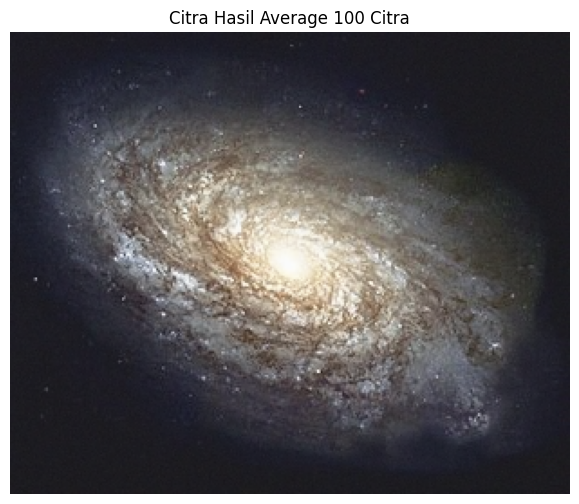


Tabel PSNR:
Jumlah Citra di Average | Nilai PSNR
5                       | 31.47 dB
10                       | 33.82 dB
20                       | 37.18 dB
40                       | 41.30 dB
80                       | 48.37 dB
100                       | 100.00 dB


In [74]:
import glob

# Fungsi untuk menghitung PSNR
def calculate_psnr(original, denoised):
    mse = np.mean((original - denoised) ** 2)
    if mse == 0:  # Jika MSE 0, artinya gambar identik
        return 100
    PIXEL_MAX = 255.0
    psnr = 20 * np.log10(PIXEL_MAX / np.sqrt(mse))
    return psnr

# Membaca citra asli
original = cv.imread('/content/drive/MyDrive/PCVK/Images/galaxy.png')

# Membaca citra dengan noise dari folder menggunakan glob
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

# Fungsi untuk menghitung rata-rata dari sejumlah gambar
def average_images(images):
    avg_img = np.mean(images, axis=0).astype(np.uint8)
    return avg_img

# Daftar jumlah gambar yang akan diaverage
average_counts = [5, 10, 20, 40, 80, 100]

# Menyimpan hasil PSNR
psnr_results = []

# Proses average dan menghitung PSNR untuk setiap jumlah gambar
for count in average_counts:
    # Ambil sejumlah gambar berdasarkan count
    images_to_average = cv_img[:count]

    # Hitung rata-rata dari gambar-gambar tersebut
    avg_img = average_images(images_to_average)

    # Hitung PSNR antara citra asli dan hasil average
    psnr_value = calculate_psnr(original, avg_img)
    psnr_results.append(psnr_value)

    # Tampilkan hasil PSNR
    print(f"nilai PSNR untuk {count} Citra di Average: {psnr_value:.2f} dB")

    # Menampilkan citra hasil average
    plt.figure(figsize=(8, 6))
    avg_img_rgb = cv.cvtColor(avg_img, cv.COLOR_BGR2RGB)
    plt.imshow(avg_img_rgb)
    plt.title(f'Citra Hasil Average {count} Citra')
    plt.axis('off')
    plt.show()

# Tabel PSNR
print("\nTabel PSNR:")
print("Jumlah Citra di Average | Nilai PSNR")
for i, count in enumerate(average_counts):
    print(f"{count}                       | {psnr_results[i]:.2f} dB")

**Kesimpulan:**

Dari hasil pengolahan citra dengan metode average denoising yang ditunjukkan dalam tabel PSNR, terlihat bahwa peningkatan jumlah citra yang diaverage secara signifikan meningkatkan nilai PSNR. Nilai PSNR meningkat dari 31.47 dB untuk 5 citra menjadi 100.00 dB untuk 100 citra, yang menunjukkan bahwa kualitas citra hasil average semakin mendekati citra asli seiring bertambahnya jumlah citra yang digunakan. Hasil ini mengindikasikan efektivitas metode averaging dalam mengurangi noise pada citra, di mana semakin banyak citra yang diaverage, semakin baik hasil denoising yang diperoleh.

## Tugas 4:  Image Masking pada Citra

In [77]:
import os

original = cv.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff')

img_mask = original.copy()
img_mask = cv.cvtColor(img_mask, cv.COLOR_BGR2RGB)

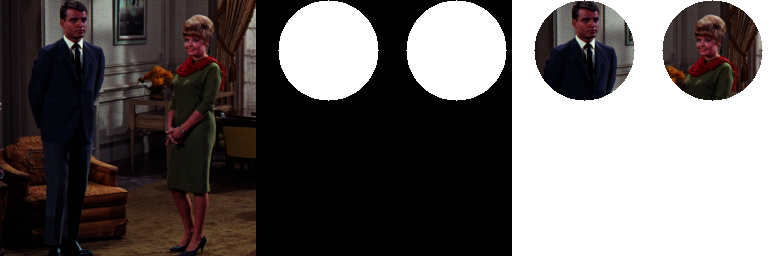

In [78]:
# Membuat mask berukuran sama dengan citra yang diisi dengan nilai 0 (hitam)
mask = np.zeros(img_mask.shape, dtype=np.uint8)

# Menggambar lingkaran putih (nilai 255) pada mask di koordinat tertentu
mask = cv.circle(mask, (72, 50), 50, (255, 255, 255), -1)  # Lingkaran pertama
mask = cv.circle(mask, (200, 50), 50, (255, 255, 255), -1)  # Lingkaran kedua

# Menggunakan operasi bitwise AND antara citra dan mask
result = cv.bitwise_and(img_mask, mask)

# Mengatur area di luar mask (nilai 0) menjadi warna putih (255)
result[mask == 0] = 255

# Konversi hasil dari BGR ke RGB untuk ditampilkan
img_mask = cv.cvtColor(img_mask, cv.COLOR_BGR2RGB)
result = cv.cvtColor(result, cv.COLOR_BGR2RGB)

# Menampilkan citra asli, mask, dan hasil proses secara berdampingan
cv2_imshow(cv.hconcat([img_mask, mask, result]))

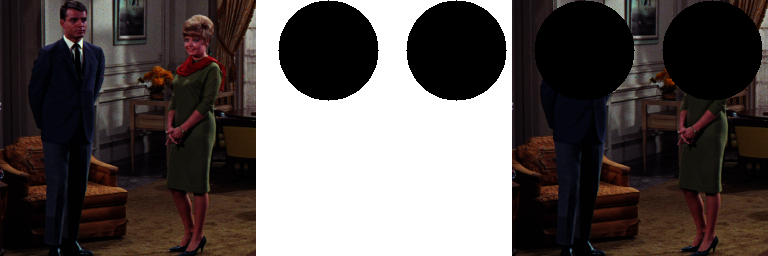

In [85]:
# Membuat mask_not dengan ukuran yang sama dengan dimensi dua citra (tanpa channel warna)
mask_not = np.zeros(img_mask.shape[:2], dtype=np.uint8)

# Menggambar dua lingkaran putih pada mask_not di posisi tertentu
mask_not = cv.circle(mask_not, (72, 50), 50, 255, -1)  # Lingkaran pertama
mask_not = cv.circle(mask_not, (200, 50), 50, 255, -1)  # Lingkaran kedua

# Menghasilkan inversi dari mask_not, yaitu area hitam menjadi putih dan sebaliknya
combine = cv.bitwise_not(mask_not)

# Mengaplikasikan operasi bitwise AND antara citra asli dan mask hasil inversi
result = cv.bitwise_and(img_mask, img_mask, mask=combine)

# Mengubah mask_not yang sebelumnya grayscale menjadi citra BGR untuk ditampilkan
combine_bgr = cv.cvtColor(combine, cv.COLOR_GRAY2BGR)

# Menampilkan citra asli, mask hasil inversi, dan hasil operasi bitwise AND secara berdampingan
cv2_imshow(cv.hconcat([img_mask, combine_bgr, result]))

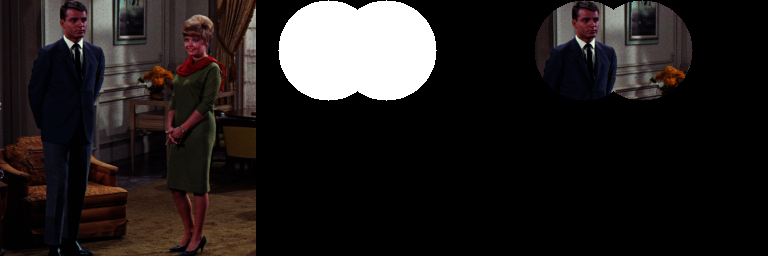

In [94]:
# Membuat dua mask kosong dengan ukuran yang sama dengan citra asli (hanya dua dimensi, tanpa channel warna)
mask_or = np.zeros(imgTgs4.shape[:2], dtype=np.uint8)
mask_or2 = np.zeros(imgTgs4.shape[:2], dtype=np.uint8)

# Menggambar lingkaran pada masing-masing mask
mask_or = cv.circle(mask_or, (72, 50), 50, 255, -1)
mask_or22 = cv.circle(mask_or2, (130, 50), 50, 255, -1)

# Operasi bitwise OR pada kedua mask
combine = cv.bitwise_or(mask_or, mask_or2)

# Mengaplikasikan hasil mask OR ke citra asli menggunakan bitwise AND
result = cv.bitwise_and(imgTgs4, imgTgs4, mask=combine)

# Konversi mask yang digunakan untuk operasi menjadi BGR agar dapat ditampilkan bersama citra lain
combine = cv.cvtColor(combine, cv.COLOR_GRAY2BGR)

# Menampilkan citra asli, mask hasil bitwise OR, dan hasil operasi bitwise AND pada citra
cv2_imshow(cv.hconcat([imgTgs4, combine, result]))

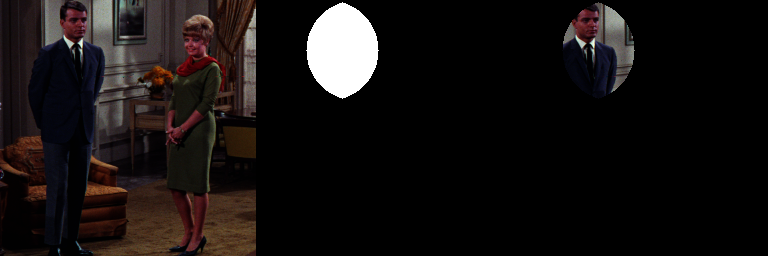

In [86]:
# Membuat dua mask kosong dengan ukuran sama dengan citra asli (hanya dua dimensi, tanpa channel warna)
mask_and = np.zeros(img_mask.shape[:2], dtype=np.uint8)
mask_and2 = np.zeros(img_mask.shape[:2], dtype=np.uint8)

# Menggambar lingkaran pada masing-masing mask
mask_and = cv.circle(mask_and, (72, 50), 50, 255, -1)   # Lingkaran pertama di mask_and
mask_and2 = cv.circle(mask_and2, (100, 50), 50, 255, -1)  # Lingkaran kedua di mask_and2

# Operasi bitwise AND pada kedua mask untuk mendapatkan area perpotongan
combine = cv.bitwise_and(mask_and, mask_and2)

# Mengaplikasikan hasil mask AND ke citra asli menggunakan bitwise AND
result = cv.bitwise_and(img_mask, img_mask, mask=combine)

# Konversi mask yang digunakan untuk operasi menjadi BGR agar dapat ditampilkan bersama citra lain
combine_bgr = cv.cvtColor(combine, cv.COLOR_GRAY2BGR)

# Menampilkan citra asli, mask hasil bitwise AND, dan hasil operasi bitwise AND pada citra
cv2_imshow(cv.hconcat([img_mask, combine_bgr, result]))

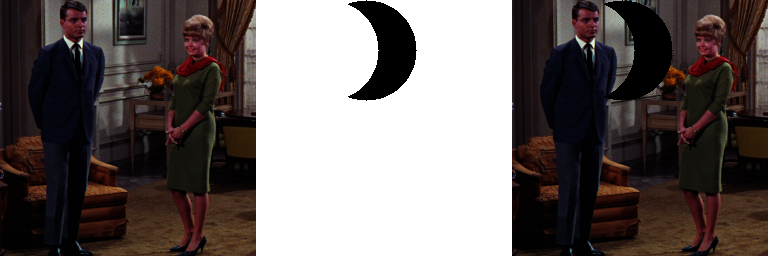

In [87]:
# Membuat dua mask kosong dengan ukuran yang sama dengan citra asli (hanya dua dimensi, tanpa channel warna)
mask_nand = np.zeros(img_mask.shape[:2], dtype=np.uint8)
mask_nand2 = np.zeros(img_mask.shape[:2], dtype=np.uint8)

# Menggambar lingkaran pada masing-masing mask
mask_nand = cv.circle(mask_nand, (72, 50), 50, 255, -1)   # Lingkaran pertama di mask_nand
mask_nand2 = cv.circle(mask_nand2, (110, 50), 50, 255, -1)  # Lingkaran kedua di mask_nand2

# Operasi bitwise OR pada mask pertama dan hasil inversi dari mask kedua untuk operasi NAND
combine = cv.bitwise_or(mask_nand, cv.bitwise_not(mask_nand2))

# Mengaplikasikan hasil mask NAND ke citra asli menggunakan bitwise AND
result = cv.bitwise_and(img_mask, img_mask, mask=combine)

# Konversi mask yang digunakan untuk operasi menjadi BGR agar dapat ditampilkan bersama citra lain
combine_bgr = cv.cvtColor(combine, cv.COLOR_GRAY2BGR)

# Menampilkan citra asli, mask hasil bitwise NAND, dan hasil operasi bitwise AND pada citra
cv2_imshow(cv.hconcat([img_mask, combine_bgr, result]))

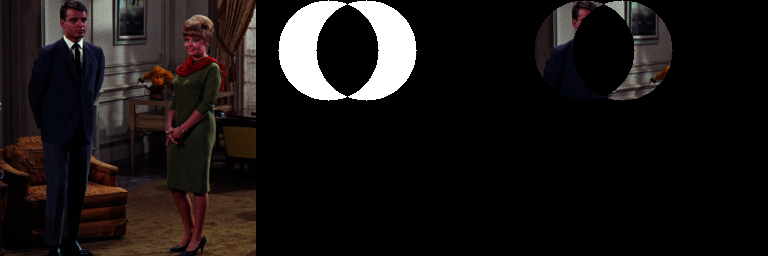

In [88]:
# Membuat dua mask kosong dengan ukuran yang sama dengan citra asli (hanya dua dimensi, tanpa channel warna)
mask_xor = np.zeros(img_mask.shape[:2], dtype=np.uint8)
mask_xor2 = np.zeros(img_mask.shape[:2], dtype=np.uint8)

# Menggambar lingkaran pada masing-masing mask
mask_xor = cv.circle(mask_xor, (72, 50), 50, 255, -1)   # Lingkaran pertama di mask_xor
mask_xor2 = cv.circle(mask_xor2, (110, 50), 50, 255, -1)  # Lingkaran kedua di mask_xor2

# Operasi bitwise XOR pada kedua mask
combine = cv.bitwise_xor(mask_xor, mask_xor2)

# Mengaplikasikan hasil mask XOR ke citra asli menggunakan bitwise AND
result = cv.bitwise_and(img_mask, img_mask, mask=combine)

# Konversi mask yang digunakan untuk operasi menjadi BGR agar dapat ditampilkan bersama citra lain
combine_bgr = cv.cvtColor(combine, cv.COLOR_GRAY2BGR)

# Menampilkan citra asli, mask hasil bitwise XOR, dan hasil operasi bitwise AND pada citra
cv2_imshow(cv.hconcat([img_mask, combine_bgr, result]))

**Hasil Analisis:**

- Pada operator NOT (Komplemen), area di luar lingkaran tetap terjaga dari citra asli, sementara area di dalam lingkaran menjadi hitam akibat inversi mask.

- Pada operator OR (Atau), lingkaran berwarna putih menampilkan citra asli di bagian dalamnya, sedangkan area di luar lingkaran menjadi hitam.

- Untuk operator AND (Dan), hanya area tumpang tindih antara kedua lingkaran yang muncul berwarna putih, menunjukkan bahwa operator AND hanya mempertahankan bagian yang ada di kedua mask.

- Dengan operator NAND (Not And), area tumpang tindih antara lingkaran dihilangkan (menjadi hitam), sementara bagian lainnya tetap terlihat.

- Terakhir, pada operator XOR (Exclusive Or), bagian di luar irisan (yang hanya diwakili oleh salah satu lingkaran) muncul berwarna putih, menunjukkan bahwa operator XOR mengambil bagian yang unik dari masing-masing mask.
